In [1]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.neural_network import MLPClassifier

In [17]:
train_set = pd.read_csv("data/treino_total.csv", sep=',', header=0, low_memory=False)
val_set = pd.read_csv("data/val_total.csv", sep=',', header=0, low_memory=False)
test_set = pd.read_csv("data/teste_total.csv", sep=',', header=0, low_memory=False)

In [18]:
# merge das duas ultimas colunas na coluna 'y'
train_set = train_set.drop('IND_BOM_1_2', 1)
train_set = train_set.rename(columns={'IND_BOM_1_1': 'y'})
val_set = val_set.drop('IND_BOM_1_2', 1)
val_set = train_set.rename(columns={'IND_BOM_1_1': 'y'})
test_set = test_set.drop('IND_BOM_1_2', 1)
test_set = test_set.rename(columns={'IND_BOM_1_1': 'y'})

# encontra as variavies categoricas
for col in train_set.columns:
    if ((train_set[col].quantile() == 1.0) | (train_set[col].quantile() == 0.0)):
        train_set[col] = train_set[col].astype('category')
for col in val_set.columns:
    if ((val_set[col].quantile() == 1.0) | (val_set[col].quantile() == 0.0)):
        val_set[col] = val_set[col].astype('category')
for col in test_set.columns:
    if ((test_set[col].quantile() == 1.0) | (test_set[col].quantile() == 0.0)):
        test_set[col] = test_set[col].astype('category')

# Embaralha os datasets
train_set = train_set.sample(frac=1)
val_set = val_set.sample(frac=1)

In [22]:
X_train = train_set.loc[:, train_set.columns != 'y']
y_train = train_set.loc[:, train_set.columns == 'y']
X_val = val_set.loc[:, val_set.columns != 'y']
y_val = val_set.loc[:, val_set.columns == 'y']
X_test = test_set.loc[:, test_set.columns != 'y']
y_test = test_set.loc[:, test_set.columns == 'y']

In [6]:
from sklearn.neural_network import MLPClassifier

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), random_state=101)
mlp.fit(X_train.values, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=101,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [32]:
predicted = mlp.predict(X_test.values)
accuracy = accuracy_score(y_test.values, predicted)
print("Mean accuracy score: {:.3}".format(accuracy))

Mean accuracy score: 0.655


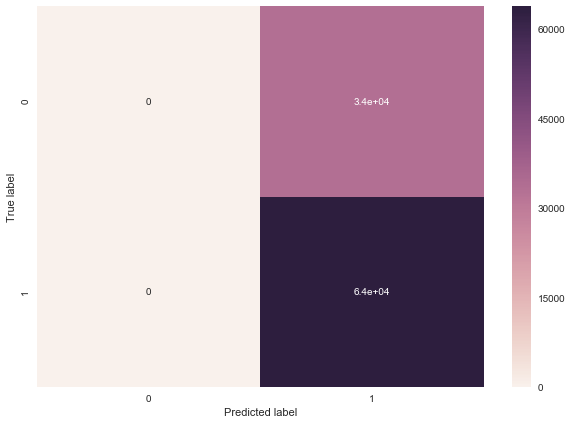

In [33]:
%matplotlib inline
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
fig = plt.figure(figsize=(10,7))
heatmap = sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

heatmap

In [34]:
y_pred_mlp = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_mlp, pos_label=1)

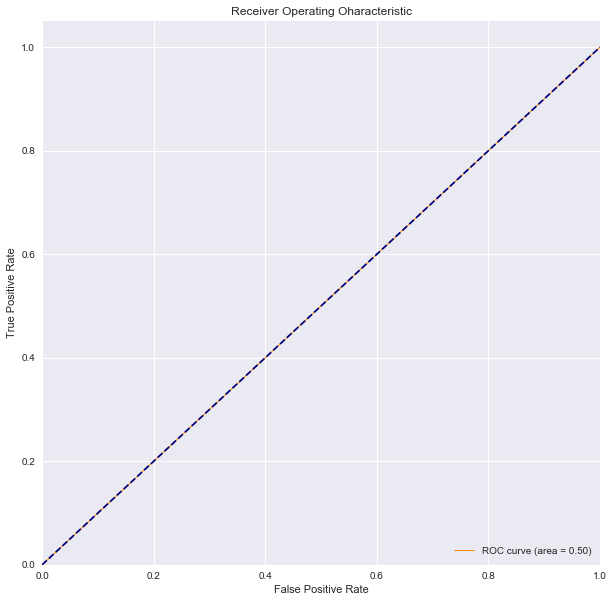

In [35]:
%matplotlib inline
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(tpr, fpr, color='darkblue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Oharacteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
roc_auc

0.5

In [16]:
clf.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)>

In [30]:
train_set[train_set.y == 1].count()

Unnamed: 0                        127549
INDEX                             127549
UF_1                              127549
UF_2                              127549
UF_3                              127549
UF_4                              127549
UF_5                              127549
UF_6                              127549
UF_7                              127549
IDADE                             127549
SEXO_1                            127549
NIVEL_RELACIONAMENTO_CREDITO01    127549
NIVEL_RELACIONAMENTO_CREDITO02    127549
BANCO_REST_IRPF_ULTIMA_1          127549
BANCO_REST_IRPF_ULTIMA_2          127549
BANCO_REST_IRPF_ULTIMA_3          127549
BANCO_REST_IRPF_ULTIMA_4          127549
BANCO_REST_IRPF_ULTIMA_5          127549
BANCO_REST_IRPF_ULTIMA_6          127549
BANCO_REST_IRPF_ULTIMA_7          127549
ATIVIDADE_EMAIL                   127549
EXPOSICAO_ENDERECO                127549
EXPOSICAO_EMAIL                   127549
EXPOSICAO_TELEFONE                127549
ATIVIDADE_ENDERE